# AMJAD KHAN BSCS   UST BANNU 

# Cryptocurrency Price Prediction with Machine Learning

In [ ]:
pip install yfinance
pip install autots

In [69]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=768)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [77]:
data.head()

Price,Date,Open,High,Low,Close,Adj Close,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2022-10-25,19344.964844,20348.412109,19261.447266,20095.857422,20095.857422,47761524910
1,2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,20770.441406,58895950537
2,2022-10-27,20772.802734,20854.044922,20255.373047,20285.835938,20285.835938,49625110402
3,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351562,20595.351562,43994715910
4,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476562,20818.476562,40369840645


In [75]:
data.tail()

Price,Date,Open,High,Low,Close,Adj Close,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
763,2024-11-26,93087.281250,94991.750000,90770.812500,91985.320312,91985.320312,91656519855
764,2024-11-27,91978.140625,97361.179688,91778.664062,95962.531250,95962.531250,71133452438
765,2024-11-28,95954.945312,96650.203125,94677.351562,95652.468750,95652.468750,52260008261
766,2024-11-29,95653.953125,98693.171875,95407.882812,97461.523438,97461.523438,54968682476
767,2024-11-30,97468.812500,97499.343750,96144.218750,96449.054688,96449.054688,31634227866


In [63]:
data.shape

(768, 7)

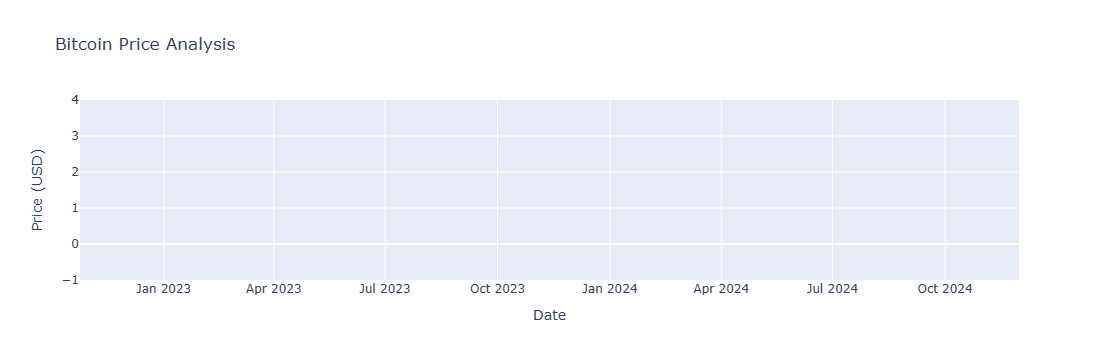

In [83]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)

figure.show()

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))# Calculate the correlation matrix

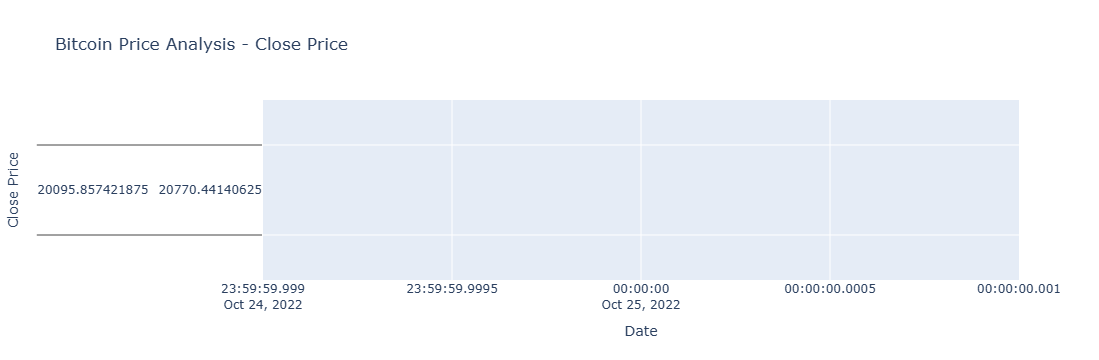

In [79]:
import plotly.graph_objects as go

# Create a line chart for the "Close" column
figure = go.Figure(data=go.Scatter(x=data["Date"], 
                                   y=data["Close"], 
                                   mode='lines',
                                   name='Close Price'))

# Update the layout
figure.update_layout(title="Bitcoin Price Analysis - Close Price",
                     xaxis_title="Date",
                     yaxis_title="Close Price",
                     xaxis_rangeslider_visible=False)

# Show the figure
figure.show()


In [9]:
print(data.columns)


MultiIndex([(     'Date',        ''),
            (     'Open', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            ('Adj Close', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [11]:
print(data.dtypes)


Price      Ticker 
Date                  datetime64[ns]
Open       BTC-USD           float64
High       BTC-USD           float64
Low        BTC-USD           float64
Close      BTC-USD           float64
Adj Close  BTC-USD           float64
Volume     BTC-USD             int64
dtype: object


In [51]:
print(data.columns.tolist())  # Lists all column names


[('Date', ''), ('Open', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Close', 'BTC-USD'), ('Adj Close', 'BTC-USD'), ('Volume', 'BTC-USD')]


In [53]:
data.rename(columns=lambda x: x.strip().lower(), inplace=True)  # Normalize column names


In [ ]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)